In [2]:
import sys
import os
sys.path.append(sys.path[0]+'/../../')
from functions import *
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import *
from datetime import datetime
import datetime as dt
from brokenaxes import brokenaxes
from matplotlib.dates import DateFormatter, DayLocator
errors=np.load(sys.path[0]+'/../NMRDataFits/FitsInRangeErrors.npy')

Hsorted_dates21p2=np.load('H2SortedDatesCorrected1p2.npy',allow_pickle=True)
H21p2=np.load('H2CorrectedDSNMR1p2.npy',allow_pickle=True)

Hsorted_dates25=np.load('H2SortedDatesCorrected5.npy',allow_pickle=True)
H25=np.load('H2CorrectedDSNMR5.npy',allow_pickle=True)

Wsorted_dates=np.load('WSortedDatesCorrected.npy',allow_pickle=True)
W=np.load('WCorrectedDSNMR.npy',allow_pickle=True)

Hsorted_dates=np.load('H3SortedDatesCorrected.npy',allow_pickle=True)
H=np.load('H3CorrectedDSNMR.npy',allow_pickle=True)

Fsorted_dates=np.load('FSortedDatesCorrected.npy',allow_pickle=True)
F=np.load('FCorrectedDSNMR.npy',allow_pickle=True)

Dsorted_dates=np.load('DSortedDatesCorrected.npy',allow_pickle=True)
D=np.load('DCorrectedDSNMR.npy',allow_pickle=True)

Csorted_dates=np.load('CSortedDatesCorrected.npy',allow_pickle=True)
C=np.load('CCorrectedDSNMR.npy',allow_pickle=True)

# Step 1: Gather spinup curves for each cell


In [3]:
def Spinup(t, P_0, P_inf, g_sc):
    import numpy as np
    return ((P_0 - P_inf)*np.exp(-1.0*g_sc*t) + P_inf)

def Fit(test,time):
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.optimize import curve_fit
    timeFit=np.linspace(time[0],time[len(time)-1],len(time)*200)
    init_vals = [test[0], test[ len(test)-1 ], 3.0] # [P_0, P_inf, g_sc]
    best_vals, covar = curve_fit(Spinup, time, test, p0=init_vals)
    yFit = Spinup(time, best_vals[0], best_vals[1], best_vals[2])
    yFitLine = Spinup(timeFit, best_vals[0], best_vals[1], best_vals[2])
    P_0 = str(np.round(best_vals[0], 3)) + " +/- " + str(np.round(np.sqrt(abs(covar[0][0])), 3)) 
    P_inf = str(np.round(best_vals[1], 3)) + " +/- " + str(np.round(np.sqrt(abs(covar[1][1])), 3)) 
    T_sc = str(np.round(1.0/best_vals[2], 3)) + " +/- " + str(np.round(np.sqrt(abs(covar[2][2]))/( best_vals[2]*best_vals[2],3)) ) 
    print("P_0 = ", P_0, '\n', "P_inf = ", P_inf, '\n',"T_sc = ", T_sc)
    return P_0,P_inf,T_sc,yFitLine,timeFit,time,test, yFit

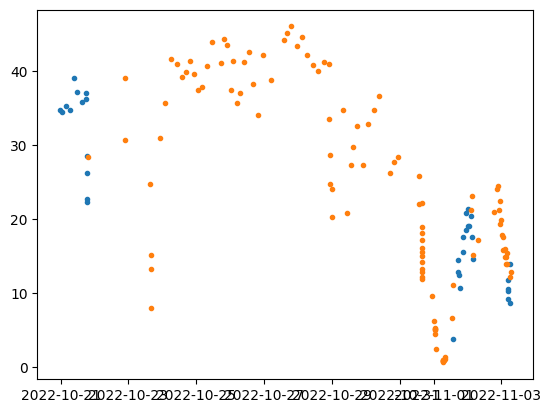

In [4]:
plt.plot(Hsorted_dates21p2,H21p2,'.')
plt.plot(Hsorted_dates25,H25,'.')

In [5]:
HcombinedDates=np.concatenate([Hsorted_dates21p2,Hsorted_dates25])
HcombinedData=np.concatenate([H21p2,H25])

In [6]:
sort_indices = np.argsort(HcombinedDates)

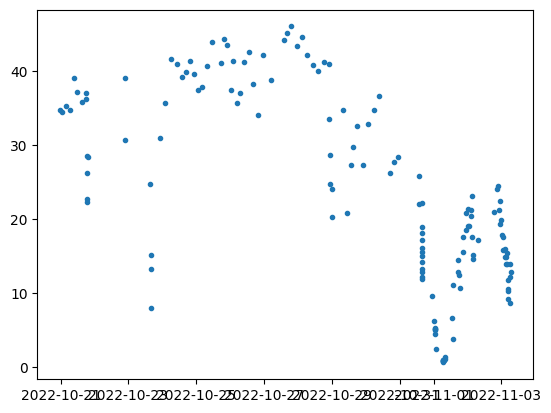

In [7]:
allHsortedDates=HcombinedDates[sort_indices]
allHsortedData=HcombinedData[sort_indices]
plt.plot(allHsortedDates,allHsortedData,'.')

# Hunter Kin3

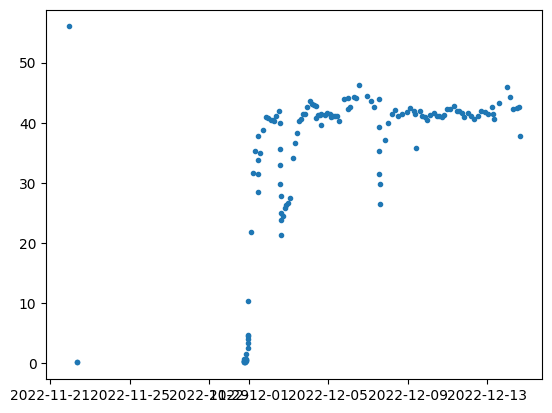

In [8]:
plt.plot(Hsorted_dates,H,'.')


P_0 =  2.851 +/- 0.549 
 P_inf =  42.202 +/- 1.751 
 T_sc =  4.946 +/- [1. 0.]


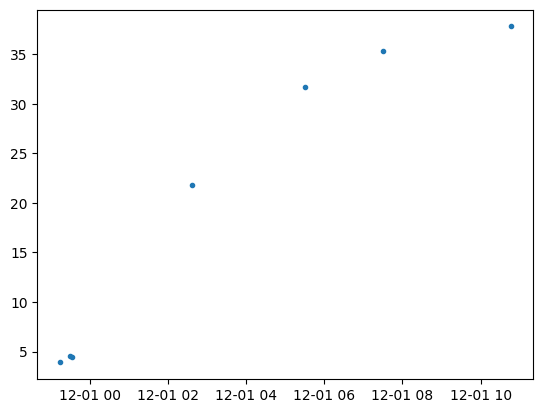

In [9]:
s=19
e=26
plt.plot(Hsorted_dates[s:e],H[s:e],'.')

hoursH=np.empty(0)
for i in range(0,len(H[s:e])):
    hoursAddup=0
    diff=Hsorted_dates[s+i]-Hsorted_dates[s]
    hoursH=np.append(hoursH,diff.total_seconds()/3600)

    
Hspinup=Fit(H[s:e],hoursH)

# Windmill

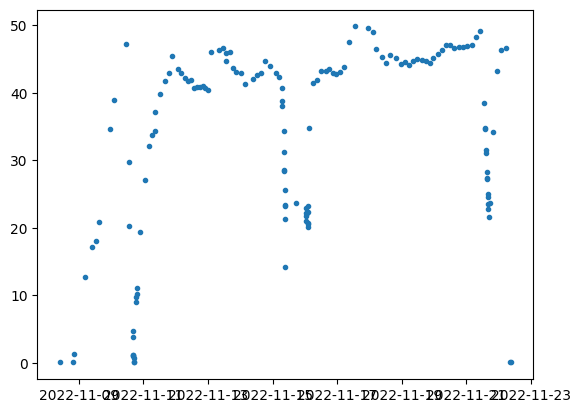

In [10]:
plt.plot(Wsorted_dates,W,'.')

P_0 =  9.089 +/- 0.646 
 P_inf =  46.483 +/- 1.093 
 T_sc =  10.45 +/- [1. 0.]


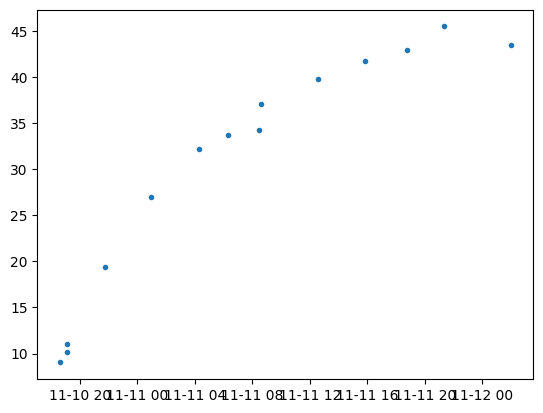

In [11]:
s=21
e=35
plt.plot(Wsorted_dates[s:e],W[s:e],'.')

hoursW=np.empty(0)
for i in range(0,len(W[s:e])):
    hoursAddup=0
    diff=Wsorted_dates[s+i]-Wsorted_dates[s]
    hoursW=np.append(hoursW,diff.total_seconds()/3600)

    
Wspinup=Fit(W[s:e],hoursW)

# Fringe

In [12]:
print(F)

[45.42879423 47.24735387 44.33557118 43.60383645 43.49114536 44.5991517
 44.60578798 43.41581265 44.76370674 42.58220123 43.28306795 46.51389508
 24.23376929 46.92524441 47.70968808 45.28969832 37.5773539  34.15727284
 32.27584871 28.77215883 30.20597179 27.15219131 26.2444001  26.25273824
 25.62928614 25.00535937 24.37051432 49.28226491 50.61169533 50.71527059
 48.51919334 49.15584455 47.10316717 46.62700557 48.0309344  46.1237337
 46.56386331 46.58159314 47.43486568 47.80695469 49.21308029 46.42703179
 48.89655471 46.8824829  47.21768733 46.96442791 47.90928795 48.94633732
 48.61248017 47.23422822 46.33198018 46.26345842 46.40824568 46.65417317
  1.22694281 51.45807502 51.34370344 48.45771182 48.90365088 48.44445316
 41.49950327 37.67441508 47.19395722 51.36243839 50.22849346 51.2553504
 52.13000286 51.5857895  51.60517126 51.59995084 50.68085048 51.03590022
 48.84078807 48.78401834 49.1108534  49.23079436 49.4543832  50.34424715
 48.50863908 16.90505339 30.92408551 44.77974581 48.89

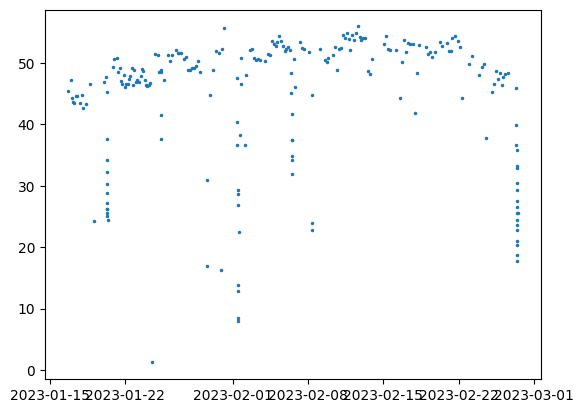

In [13]:
plt.plot(Fsorted_dates,F,'.', markersize=3)

(0.0, 60.0)

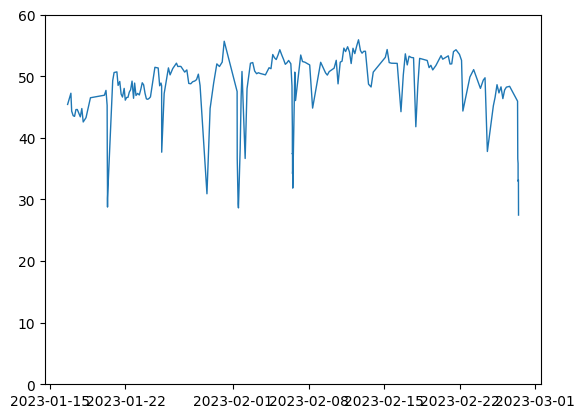

In [14]:

# Your data array
data = F  # replace [...] with your data points

# Calculate Q1 and Q3
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate the IQR
IQR = Q3 - Q1

# Define a multiplier
multiplier = 1.5

# Determine bounds for outliers
lower_bound = Q1 - (multiplier * IQR)
upper_bound = Q3 + (multiplier * IQR)

# Get indices of non-outliers
non_outlier_indices = np.where((data >= lower_bound) & (data <= upper_bound))

# Filter the data to remove outliers
filtered_data = data[non_outlier_indices]
filtered_dates=Fsorted_dates[non_outlier_indices]
plt.plot(filtered_dates,filtered_data, linewidth=1)
plt.ylim(0,60)

P_0 =  12.941 +/- 0.013 
 P_inf =  56.417 +/- 0.037 
 T_sc =  3.449 +/- [0. 0.]


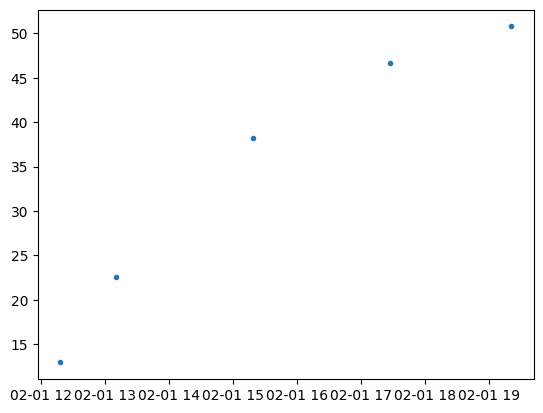

In [15]:
s=97
e=102
plt.plot(Fsorted_dates[s:e],F[s:e],'.')

hoursF=np.empty(0)
for i in range(0,len(F[s:e])):
    hoursAddup=0
    diff=Fsorted_dates[s+i]-Fsorted_dates[s]
    hoursF=np.append(hoursF,diff.total_seconds()/3600)

    
Fspinup=Fit(F[s:e],hoursF)

# Donya

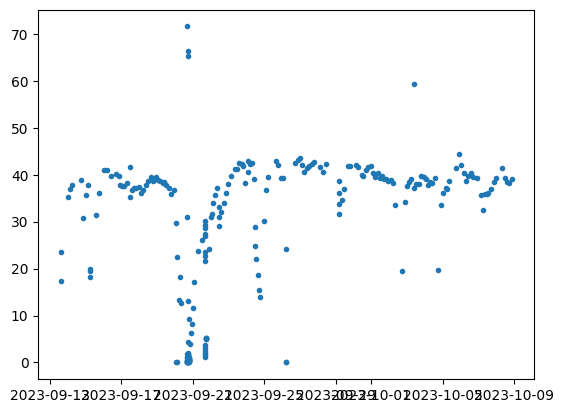

In [16]:
plt.plot(Dsorted_dates,D,'.')

P_0 =  24.232 +/- 0.292 
 P_inf =  38.718 +/- 0.601 
 T_sc =  5.105 +/- [0. 0.]


/tmp/ipykernel_6891/421607419.py:3: RuntimeWarning: overflow encountered in exp
  return ((P_0 - P_inf)*np.exp(-1.0*g_sc*t) + P_inf)


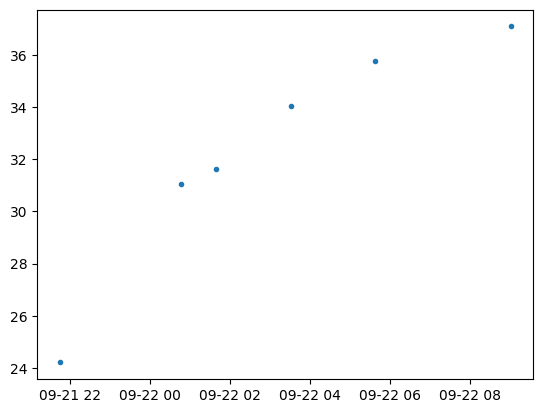

In [17]:
s=118
e=124
plt.plot(Dsorted_dates[s:e],D[s:e],'.')

hoursD=np.empty(0)
for i in range(0,len(D[s:e])):
    hoursAddup=0
    diff=Dsorted_dates[s+i]-Dsorted_dates[s]
    hoursD=np.append(hoursD,diff.total_seconds()/3600)

    
Dspinup=Fit(D[s:e],hoursD)

# Christin

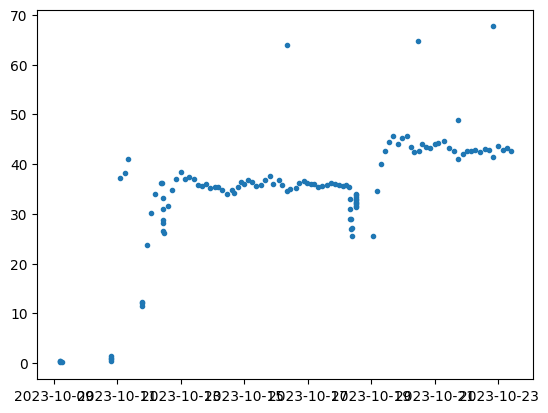

In [18]:
plt.plot(Csorted_dates,C,'.')

P_0 =  34.529 +/- 0.037 
 P_inf =  46.8 +/- 0.077 
 T_sc =  5.515 +/- [0. 0.]


/tmp/ipykernel_6891/421607419.py:3: RuntimeWarning: overflow encountered in exp
  return ((P_0 - P_inf)*np.exp(-1.0*g_sc*t) + P_inf)


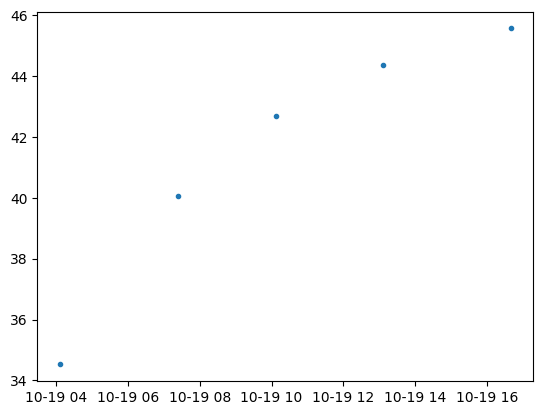

In [19]:
s=90
e=95
plt.plot(Csorted_dates[s:e],C[s:e],'.')

hoursC=np.empty(0)
for i in range(0,len(C[s:e])):
    hoursAddup=0
    diff=Csorted_dates[s+i]-Csorted_dates[s]
    hoursC=np.append(hoursC,diff.total_seconds()/3600)

    
Cspinup=Fit(C[s:e],hoursC)

# Step 2: Linear interpolation

### First, combine all arrays

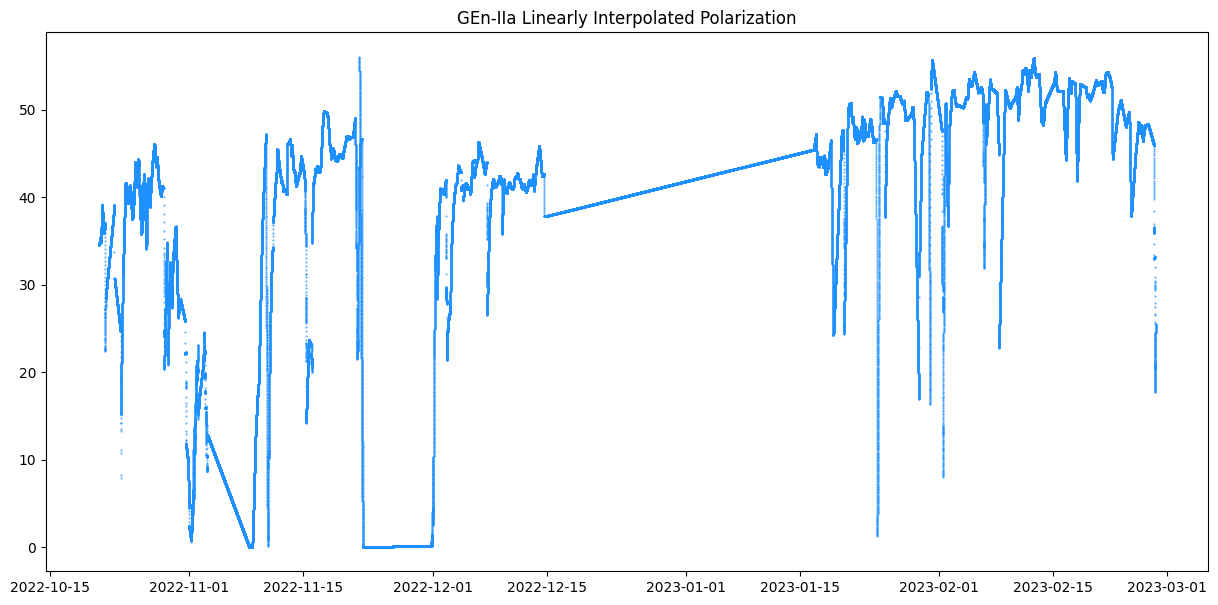

In [20]:
allDatesA=np.concatenate([allHsortedDates,Wsorted_dates,Hsorted_dates,Fsorted_dates])
allDataA=np.concatenate([allHsortedData,W,H,F])

dates=allDatesA
data=allDataA

all_dates = []
all_interpolated_values = []
all_slopes=np.empty(0)
all_start=np.empty(0)
all_end=np.empty(0)
shader=[]

Barrier=4
for i in range(len(data) - 1):
    start_date, end_date = dates[i], dates[i + 1]
    start_value, end_value = data[i], data[i + 1]

    date_range = pd.date_range(start_date, end_date, freq='1T')

    slope = (end_value - start_value) / ((end_date - start_date).total_seconds() / 60)
    all_slopes=np.append(all_slopes,slope)
    all_start=np.append(all_start,start_date)
    all_end=np.append(all_end,end_date)
    if(slope>(Barrier/60)):
        shader.append('yellow')
    elif(slope<0):
        shader.append('dodgerblue')
    else:
        shader.append('dodgerblue')
    interpolated_values = start_value + slope * (date_range - start_date).total_seconds() / 60

    all_dates.extend(date_range)
    all_interpolated_values.extend(interpolated_values)

interpDates = np.array(all_dates)
interpData = np.array(all_interpolated_values)



plt.figure(figsize=(15,7))
plt.plot(interpDates,interpData,'.',markersize=.8,color='dodgerblue')
plt.title('GEn-IIa Linearly Interpolated Polarization')


df2 = pd.DataFrame({'Interpolated Dates': interpDates, 'Interpolated Data': interpData})

# Export df2 to CSV
df2.to_csv('InterpolatedPol-A.csv', index=False)

In [25]:
interpDates[0]

Timestamp('2022-10-20 23:34:11', freq='T')

In [22]:
shader[2]

'dodgerblue'

# Splitting up into kinematic

In [53]:
k2s='20221019_194300'
k2e='20221108_155000'
k3s='20221108_100000'
k3e='20221215_174959'
k4s='20230113_000000'
k4e='20241009_000000'

In [54]:
k2TS = pd.to_datetime(k2s, format='%Y%m%d_%H%M%S')
k2TE = pd.to_datetime(k2e, format='%Y%m%d_%H%M%S')
k3TS = pd.to_datetime(k3s, format='%Y%m%d_%H%M%S')
k3TE = pd.to_datetime(k3e, format='%Y%m%d_%H%M%S')
k4TS = pd.to_datetime(k4s, format='%Y%m%d_%H%M%S')
k4TE = pd.to_datetime(k4e, format='%Y%m%d_%H%M%S')

In [55]:
k2Mask=(interpDates >= k2TS) & (interpDates <= k2TE)
k3Mask=(interpDates >= k3TS) & (interpDates <= k3TE)
k4Mask=(interpDates >= k4TS) & (interpDates <= k4TE)

In [56]:
k2InterpDates=interpDates[k2Mask]
k2InterpData=interpData[k2Mask]
k3InterpDates=interpDates[k3Mask]
k3InterpData=interpData[k3Mask]
k4InterpDates=interpDates[k4Mask]
k4InterpData=interpData[k4Mask]

(array([19372., 19379., 19389., 19396., 19403., 19410., 19417.]),
 [Text(19372.0, 0, '2023-01-15'),
  Text(19379.0, 0, '2023-01-22'),
  Text(19389.0, 0, '2023-02-01'),
  Text(19396.0, 0, '2023-02-08'),
  Text(19403.0, 0, '2023-02-15'),
  Text(19410.0, 0, '2023-02-22'),
  Text(19417.0, 0, '2023-03-01')])

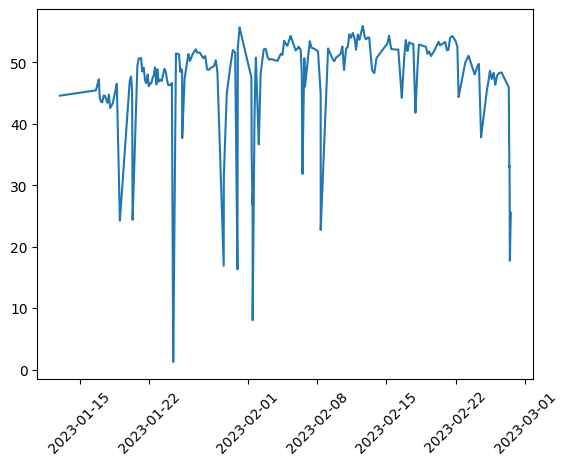

In [57]:
plt.plot(k4InterpDates,k4InterpData)
plt.xticks(rotation=45)

In [58]:
df2K2 = pd.DataFrame({'Interpolated Dates': k2InterpDates, 'Interpolated Data': k2InterpData})
df2K2.to_csv('InterpolatedPol-AK2.csv', index=False)

df2K3 = pd.DataFrame({'Interpolated Dates': k3InterpDates, 'Interpolated Data': k3InterpData})
df2K3.to_csv('InterpolatedPol-AK3.csv', index=False)

df2K4 = pd.DataFrame({'Interpolated Dates': k4InterpDates, 'Interpolated Data': k4InterpData})
df2K4.to_csv('InterpolatedPol-AK4.csv', index=False)

# %/Hour histogram 

In [ ]:
g=plt.hist(all_slopes*60,bins=80,range=(-20,20),color='dodgerblue')
plt.xlabel('Percent/Hour')
plt.ylabel('#')
plt.title('Histogram of Slopes Between NMRs')
plt.text(5,140,"Only 36 Slopes Greater \nThan 4 %/Hr")

In [ ]:
len(np.where(all_slopes*60>4)[0])

In [ ]:
len(all_start)

In [ ]:
all_start[1]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(interpDates,interpData,'.',markersize=.4,color='black')
ax.set_title('GEn-IIa Linearly Interpolated Polarization')
for i in range(len(shader)):
    start = all_start[i]
    end = all_end[i]
    ax.axvspan(start, end, color=shader[i], alpha=.5)  # Adj
    
ax.plot(all_start[0],0,color='dodgerblue',label="slope<4%/hr")
ax.plot(all_start[0],0,color='yellow',label="slope>4%/hr")

leg=ax.legend(loc='lower left',prop={'size': 'large'})



In [ ]:
yellowI = [i for i, value in enumerate(shader) if value == 'yellow']
plt.plot(allDatesA[yellowI],allDataA[yellowI],'.',markersize=3,color='black')
plt.xticks(rotation=45)
plt.ylabel("Polarization %")
plt.title("Volatile Polarizations")

In [ ]:
x=plt.hist(shader,bins=200)

# Fit Volatile Groups

In [ ]:
ranges = [list(range(i-9, i+10)) for i in yellowI]

# Convert the list of lists into a NumPy array
SpinupGroups = np.array(ranges)

In [ ]:
allDatesA[SpinupGroups[2]]

In [ ]:
for i in range(0,len(SpinupGroups)):
    plt.plot(allDatesA[SpinupGroups[i]],allDataA[SpinupGroups[i]])

In [ ]:
for i in range(0,len(SpinupGroups)):
    plt.figure()
    plt.plot(allDatesA[SpinupGroups[i]],allDataA[SpinupGroups[i]],'.')
    plt.xticks(rotation=45)